In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/labeled_data.csv"
train=pd.read_csv(path)
train.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df = train[['tweet','class']]
df.columns = ['Text', 'Result']
df.head(-100)

,Text,Result
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24678,when yo song come on and you hit the blunt har...,1
24679,when you first walked in the door at that part...,1
24680,"when you're stupid, you don't know it. life is...",1
24681,where da ratchet hoes at?,1


In [ ]:
pd.options.mode.chained_assignment = None
# Define a function to categorize cyberbullying result into two groups
df.loc[:,'Result']  = df['Result'].apply(lambda x: 1 if x != 2 else 2)
df.head(-10)

,Text,Result
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
24768,you know what your doing when you favorite a t...,1
24769,"you lil dumb ass bitch, i ain't fuckin wit chu...",1
24770,you look like AC Green...bitch don't call here...,1
24771,you look like your 12 stop talking about fucki...,1


In [ ]:
df['Result'].value_counts()

1    20620
2     4163
Name: Result, dtype: int64

In [ ]:
df.shape

(24783, 2)

In [ ]:
import plotly.express as px

import plotly.express as px

fig = px.pie(values = [(20620/24783)*100, (4163/24783)*100],
             names = ['Bullying', 'Not Bullying'],
             color_discrete_sequence = ['brown'],
             hole = 0.5)

fig.show()

In [ ]:
df['Text'].isnull().values.any()

False

In [ ]:
df['Text'].drop_duplicates()

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: Text, Length: 24783, dtype: object

In [ ]:
df.Text.nunique(dropna = True)

24783

In [ ]:
df.shape

(24783, 2)

In [ ]:
#lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
df.head()

,Text,Result
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt mleew17 boy dats coldtyga dwn bad for cuff...,1
2,rt urkindofbrand dawg rt 80sbaby4life you eve...,1
3,rt c_g_anderson viva_based she look like a tr...,1
4,rt shenikaroberts the shit you hear about me ...,1


In [ ]:
#numeric removal
pattern = r'\d+'
df['Text'] = df['Text'].apply(lambda x: re.sub(pattern, '', x))
df.loc[:, ['Text']]

,Text
0,rt mayasolovely as a woman you shouldnt compl...
1,rt mleew boy dats coldtyga dwn bad for cuffin...
2,rt urkindofbrand dawg rt sbabylife you ever f...
3,rt c_g_anderson viva_based she look like a tr...
4,rt shenikaroberts the shit you hear about me ...
...,...
24778,yous a muthafin lie lifeasking _pearls corey_e...
24779,youve gone and broke the wrong heart baby and ...
24780,young buck wanna eat dat nigguh like i aint fu...
24781,youu got wild bitches tellin you lies


In [ ]:
import string
# Define a function to remove punctuation from a string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'Text' column of the dataframe
df['Text'] = df['Text'].apply(remove_punctuation)
df.head()

,Text,Result
0,rt mayasolovely as a woman you shouldnt compl...,2
1,rt mleew boy dats coldtyga dwn bad for cuffin...,1
2,rt urkindofbrand dawg rt sbabylife you ever f...,1
3,rt cganderson vivabased she look like a tranny,1
4,rt shenikaroberts the shit you hear about me ...,1


In [ ]:
import nltk
nltk.download('stopwords')
#Remove stopwords
stop=stopwords.words("english")
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop.extend(["could","though","would","also","many",'much'])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('punkt')
#After removing stopwords
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop]))
df['Words'] = df['Text'].apply(lambda x : len(str(x).split()))

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Text,Result,Words
0,rt mayasolovely woman shouldnt complain cleani...,2,12
1,rt mleew boy dats coldtyga dwn bad cuffin dat ...,1,12
2,rt urkindofbrand dawg rt sbabylife ever fuck b...,1,12
3,rt cganderson vivabased look like tranny,1,6
4,rt shenikaroberts shit hear might true might f...,1,11


In [ ]:
df['Word_count'] = df['Text'].apply(lambda x : len(str(x).split()))
df.head()

,Text,Result,Words,Word_count
0,rt mayasolovely woman shouldnt complain cleani...,2,12,12
1,rt mleew boy dats coldtyga dwn bad cuffin dat ...,1,12,12
2,rt urkindofbrand dawg rt sbabylife ever fuck b...,1,12,12
3,rt cganderson vivabased look like tranny,1,6,6
4,rt shenikaroberts shit hear might true might f...,1,11,11


In [ ]:
# Define a function to remove short words
def remove_short_words(text):
    words = text.split()
    filtered_words = []
    for word in words:
        if len(word) > 2:
            filtered_words.append(word)
    filtered_text = " ".join(filtered_words)
    return filtered_text

# Apply the function to the 'text' column of the dataframe
df['Text'] = df['Text'].apply(remove_short_words)
df['Word_count'] = df['Text'].apply(lambda x : len(str(x).split()))
df.head()

,Text,Result,Words,Word_count
0,mayasolovely woman shouldnt complain cleaning ...,2,12,11
1,mleew boy dats coldtyga dwn bad cuffin dat hoe...,1,12,10
2,urkindofbrand dawg sbabylife ever fuck bitch s...,1,12,10
3,cganderson vivabased look like tranny,1,6,5
4,shenikaroberts shit hear might true might fake...,1,11,9


In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
nltk.download('averaged_perceptron_tagger')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["Text"] = df["Text"].apply(lambda text: lemmatize_words(text))
df['Word_count'] = df['Text'].apply(lambda x : len(str(x).split()))
df.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Text,Result,Words,Word_count
0,mayasolovely woman shouldnt complain cleaning ...,2,12,11
1,mleew boy dat coldtyga dwn bad cuffin dat hoe ...,1,12,10
2,urkindofbrand dawg sbabylife ever fuck bitch s...,1,12,10
3,cganderson vivabased look like tranny,1,6,5
4,shenikaroberts shit hear might true might fake...,1,11,9


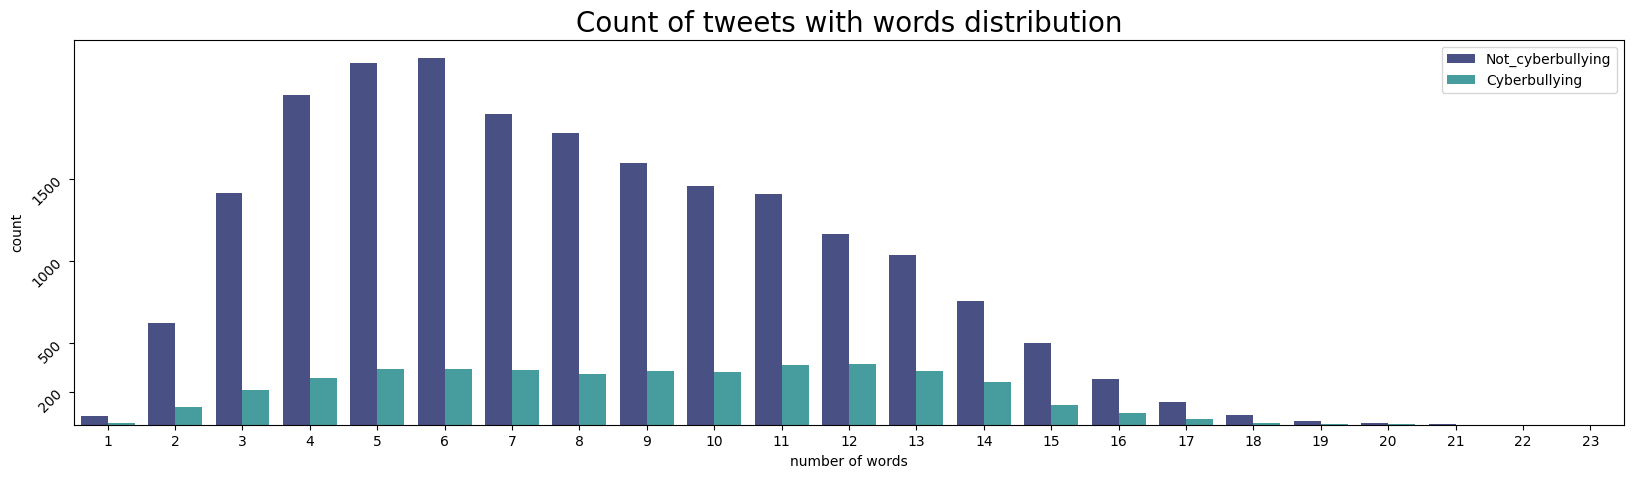

In [ ]:
import seaborn as sns

plt.figure(figsize=(20,5))
ax = sns.countplot(x='Word_count', data=df[df['Word_count']<=1000], hue=df['Result'], palette='mako')
plt.title('Count of tweets with words distribution', fontsize=20)
plt.legend(['Not_cyberbullying', 'Cyberbullying'])
plt.yticks([200, 500, 1000, 1500], ['200','500', '1000', '1500'],rotation=45)
plt.ylabel('count')
plt.xlabel('number of words')
plt.show()

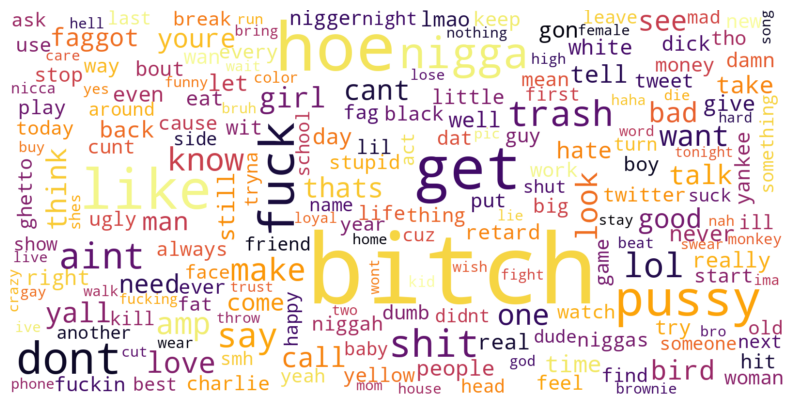

In [ ]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tokenize the text data
words = []
for text in df['Text']:
    words.extend(text.split())

# Count the frequency of each word
word_counts = Counter(words)

# Create a dictionary that maps each word to its frequency
word_freq = {word: count for word, count in word_counts.items() if len(word) > 2}

# Create the word cloud
wordcloud = WordCloud( width=1600,
    height=800,
    max_font_size=200,
    colormap='inferno',
    background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
corpus = df['Text'].to_numpy()
corpus

array(['mayasolovely woman shouldnt complain cleaning house amp man always take trash',
       'mleew boy dat coldtyga dwn bad cuffin dat hoe place',
       'urkindofbrand dawg sbabylife ever fuck bitch start cry confuse shit',
       ..., 'young buck wan eat dat nigguh like aint fuckin dis',
       'youu get wild bitch tellin lie',
       'ruffle ntac eileen dahlia beautiful color combination pink orange yellow amp white coll httptcohdyebvnzb'],
      dtype=object)

In [ ]:
# Feature extraction using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus)
y = df['Result']

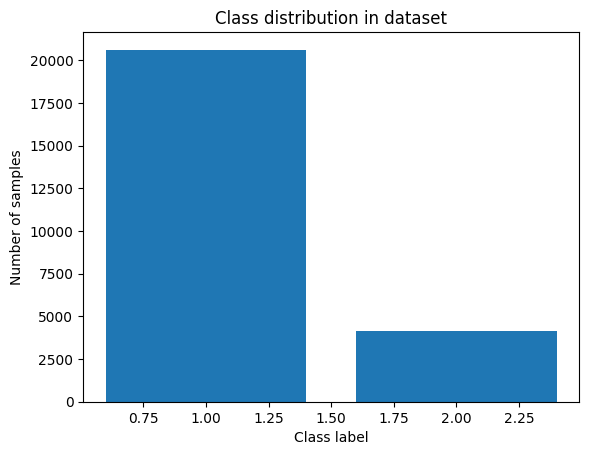

In [ ]:
import matplotlib.pyplot as plt

# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(y, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

In [ ]:
# Assume that y is a list or array containing the class labels of your dataset
unique_labels, counts = np.unique(y, return_counts=True)
proportions = counts / len(y)

print(proportions)

[0.83202195 0.16797805]


In [ ]:
def make_confusion_matrix( cfm, title):
    group_names = ['TN','FP','FN','TP']

    group_counts = ["{0:0.0f}".format(value) for value in
                cfm.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                     cfm.flatten()/np.sum(cfm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(2,2)
    plt.title(title)

    sns.heatmap(cfm, annot=labels, fmt="")
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted',fontsize=12)

In [ ]:
from imblearn.over_sampling import SMOTE

# perform SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# count the number of instances for each class
class_count = y_resampled.value_counts()

# print the class count
print(class_count)

2    20620
1    20620
Name: Result, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
X_train.shape, X_test.shape

((17348, 33242), (7435, 33242))

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_svc = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
report = classification_report(y_test, y_pred )
print(report)
print(accuracy)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97      6097
           2       0.86      0.86      0.86      1338

    accuracy                           0.95      7435
   macro avg       0.92      0.92      0.92      7435
weighted avg       0.95      0.95      0.95      7435

0.9509078681909886


In [ ]:
classification = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
classification

,1,2,accuracy,macro avg,weighted avg
precision,0.969990,0.863874,0.950908,0.916932,0.950894
recall,0.970149,0.863229,0.950908,0.916689,0.950908
f1-score,0.970070,0.863551,0.950908,0.916811,0.950901
support,6097.000000,1338.000000,0.950908,7435.000000,7435.000000


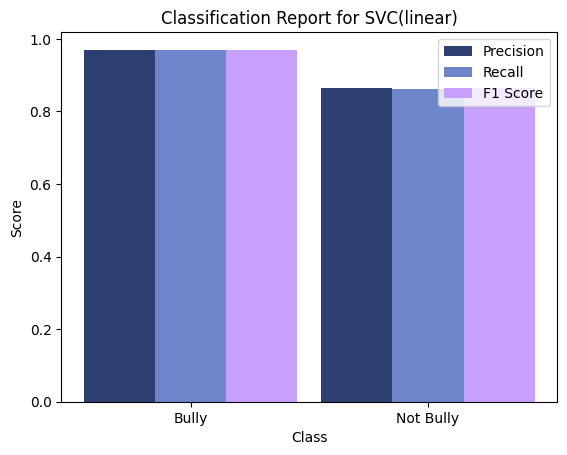

In [ ]:
bully_metrics = classification["1"]
not_bully_metrics = classification["2"]

precision = [bully_metrics["precision"], not_bully_metrics["precision"]]
recall = [bully_metrics["recall"], not_bully_metrics["recall"]]
f1_score = [bully_metrics["f1-score"], not_bully_metrics["f1-score"]]
labels = ['Bully', 'Not Bully']

# Plot the results in a bar plot
x = np.arange(len(labels))
width = 0.3

# Specify the colors for the bars
colors = ['#2D3E70', '#7086CB', '#C7A0FC']

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision',color=colors[0])
ax.bar(x, recall, width, label='Recall',color=colors[1])
ax.bar(x + width, f1_score, width, label='F1 Score',color=colors[2])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report for SVC(linear)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

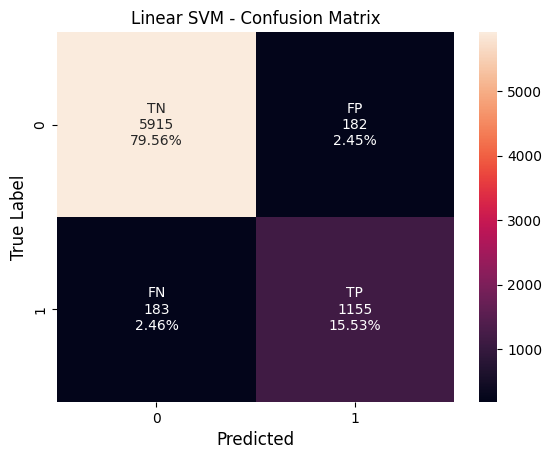

In [ ]:
bin_svm_cm = confusion_matrix(y_test, y_pred )
make_confusion_matrix(bin_svm_cm, 'Linear SVM - Confusion Matrix')

In [ ]:
#Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_mnb = accuracy_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred )
print(report)
print(accuracy)

              precision    recall  f1-score   support

           1       0.83      1.00      0.91      6097
           2       0.98      0.08      0.14      1338

    accuracy                           0.83      7435
   macro avg       0.91      0.54      0.53      7435
weighted avg       0.86      0.83      0.77      7435

0.833759246805649


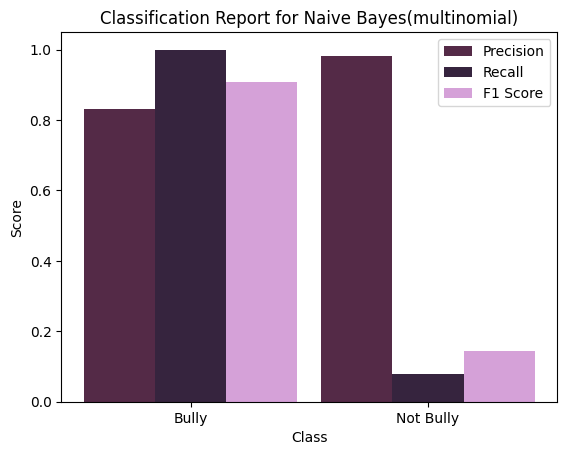

In [ ]:
classification = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
bully_metrics = classification["1"]
not_bully_metrics = classification["2"]

precision = [bully_metrics["precision"], not_bully_metrics["precision"]]
recall = [bully_metrics["recall"], not_bully_metrics["recall"]]
f1_score = [bully_metrics["f1-score"], not_bully_metrics["f1-score"]]
labels = ['Bully', 'Not Bully']

# Plot the results in a bar plot
x = np.arange(len(labels))
width = 0.3

# Specify the colors for the bars
colors = ['#542A47', '#36243E', '#D5A1D8']

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision',color=colors[0])
ax.bar(x, recall, width, label='Recall',color=colors[1])
ax.bar(x + width, f1_score, width, label='F1 Score',color=colors[2])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Naive Bayes(multinomial)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

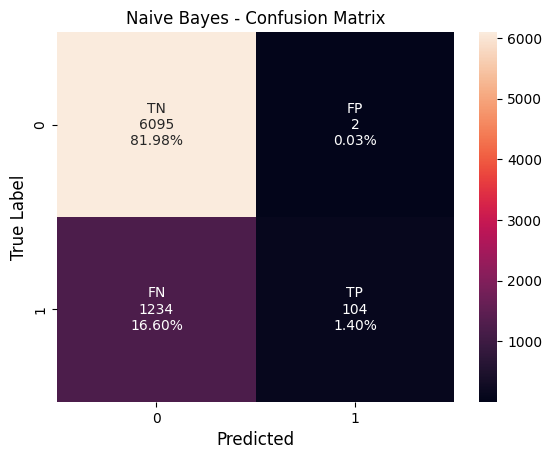

In [ ]:
bin_naive_cm = confusion_matrix(y_test, y_pred )
make_confusion_matrix(bin_naive_cm, 'Naive Bayes - Confusion Matrix')

In [ ]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_lr = accuracy_score(y_test, y_pred)

In [ ]:
classification_report
report = classification_report(y_test, y_pred )
print(report)
print(accuracy)

              precision    recall  f1-score   support

           1       0.93      0.98      0.96      6097
           2       0.90      0.68      0.77      1338

    accuracy                           0.93      7435
   macro avg       0.92      0.83      0.86      7435
weighted avg       0.93      0.93      0.92      7435

0.92817753866846


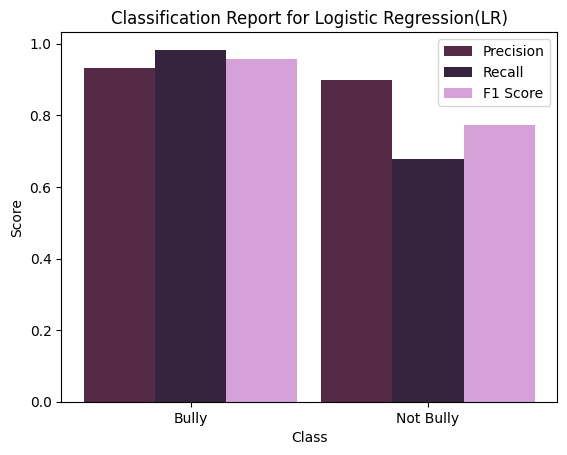

In [ ]:
classification = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))
classification


bully_metrics = classification["1"]
not_bully_metrics = classification["2"]

precision = [bully_metrics["precision"], not_bully_metrics["precision"]]
recall = [bully_metrics["recall"], not_bully_metrics["recall"]]
f1_score = [bully_metrics["f1-score"], not_bully_metrics["f1-score"]]
labels = ['Bully', 'Not Bully']

# Plot the results in a bar plot
x = np.arange(len(labels))
width = 0.3

# Specify the colors for the bars
colors = ['#542A47', '#36243E', '#D5A1D8']

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision',color=colors[0])
ax.bar(x, recall, width, label='Recall',color=colors[1])
ax.bar(x + width, f1_score, width, label='F1 Score',color=colors[2])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Logistic Regression(LR)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

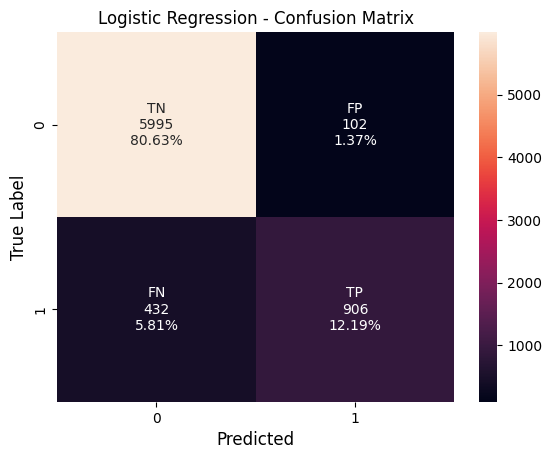

In [ ]:
bin_logistic_cm = confusion_matrix(y_test, y_pred )
make_confusion_matrix(bin_logistic_cm, 'Logistic Regression - Confusion Matrix')

In [ ]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy_rf = accuracy_score(y_test, y_pred)

In [ ]:
classification_report
report = classification_report(y_test, y_pred )
print(report)
print(accuracy)

              precision    recall  f1-score   support

           1       0.95      0.98      0.96      6097
           2       0.89      0.75      0.82      1338

    accuracy                           0.94      7435
   macro avg       0.92      0.87      0.89      7435
weighted avg       0.94      0.94      0.94      7435

0.9386684599865501


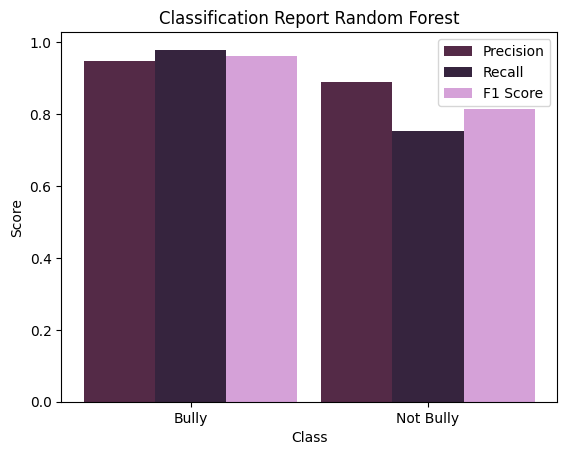

In [ ]:
classification = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))


bully_metrics = classification["1"]
not_bully_metrics = classification["2"]

precision = [bully_metrics["precision"], not_bully_metrics["precision"]]
recall = [bully_metrics["recall"], not_bully_metrics["recall"]]
f1_score = [bully_metrics["f1-score"], not_bully_metrics["f1-score"]]
labels = ['Bully', 'Not Bully']

# Plot the results in a bar plot
x = np.arange(len(labels))
width = 0.3

# Specify the colors for the bars
colors = ['#542A47', '#36243E', '#D5A1D8']

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision',color=colors[0])
ax.bar(x, recall, width, label='Recall',color=colors[1])
ax.bar(x + width, f1_score, width, label='F1 Score',color=colors[2])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

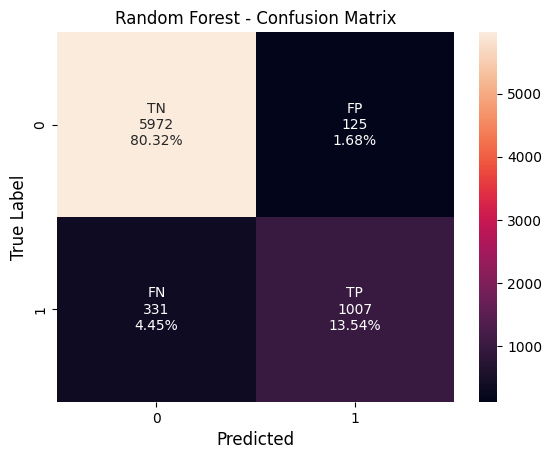

In [ ]:
bin_random_cm = confusion_matrix(y_test, y_pred )
make_confusion_matrix(bin_random_cm, 'Random Forest - Confusion Matrix')

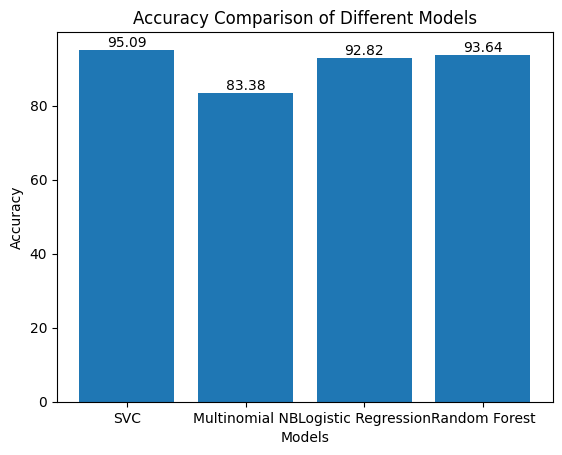

In [ ]:
# Create a stacked bar plot
models = ['SVC', 'Multinomial NB', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_svc*100, accuracy_mnb*100, accuracy_lr*100,accuracy_rf*100]



plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')



# Display the actual accuracy values on each bar
for i, v in enumerate(accuracies):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [ ]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
classification_report
report = classification_report(y_test, y_pred )
print(report)
print(accuracy)

              precision    recall  f1-score   support

           1       0.97      0.96      0.96      6097
           2       0.83      0.84      0.83      1338

    accuracy                           0.94      7435
   macro avg       0.90      0.90      0.90      7435
weighted avg       0.94      0.94      0.94      7435

0.9400134498991257


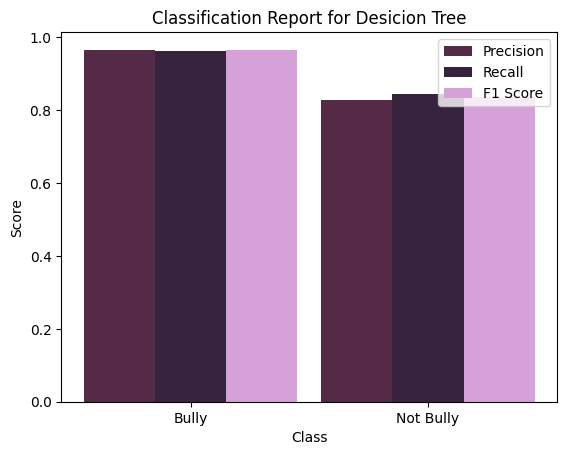

In [ ]:
classification = pd.DataFrame(classification_report(y_test,y_pred,output_dict=True))


bully_metrics = classification["1"]
not_bully_metrics = classification["2"]

precision = [bully_metrics["precision"], not_bully_metrics["precision"]]
recall = [bully_metrics["recall"], not_bully_metrics["recall"]]
f1_score = [bully_metrics["f1-score"], not_bully_metrics["f1-score"]]
labels = ['Bully', 'Not Bully']

# Plot the results in a bar plot
x = np.arange(len(labels))
width = 0.3

# Specify the colors for the bars
colors = ['#542A47', '#36243E', '#D5A1D8']

fig, ax = plt.subplots()
ax.bar(x - width, precision, width, label='Precision',color=colors[0])
ax.bar(x, recall, width, label='Recall',color=colors[1])
ax.bar(x + width, f1_score, width, label='F1 Score',color=colors[2])

ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report for Desicion Tree')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

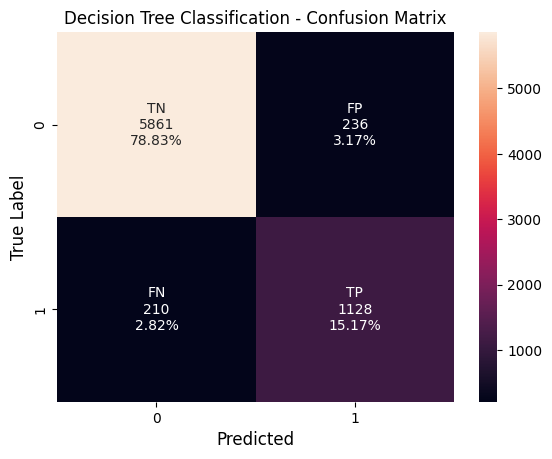

In [ ]:
bin_decision_cm = confusion_matrix(y_test, y_pred )
make_confusion_matrix(bin_decision_cm, 'Decision Tree Classification - Confusion Matrix')

In [ ]:
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.callbacks import LambdaCallback
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
from keras.optimizers import RMSprop
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import random
import sys
import io
import re
import string
from keras.layers import Dense

# This code was tested with TensorFlow v1.4
print("You have TensorFlow version", tf.__version__)

import numpy as np

from keras import Sequential
from keras import layers

from keras.preprocessing import sequence
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

You have TensorFlow version 2.12.0


In [ ]:
max_features = 100
# cut texts after this number of words
# (among top max_features most common words)
max_len = 100
batch_size =32
#x_train[0:1]
#x_train

In [ ]:
max_len = 500       #length of sequence
batch_size = 256
epochs = 500

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
#max_features = len(word_index) + 1   # (number of words in the vocabulary) + 1
#x_train = sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')

In [ ]:
!pip install "pad-sequences>=0.6.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pad-sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=42b3a955ee05152c859b50bbe72326f15393d4a535a080ec811a576c178b2941
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad-sequences


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 33243 unique tokens.


In [ ]:
from tensorflow import keras
from keras import preprocessing
from keras.utils import pad_sequences

In [ ]:
features = tokenizer.texts_to_sequences(df['Text'].values)
features = pad_sequences(features, maxlen = MAX_SEQUENCE_LENGTH)
print('Shape of input tensor:', features.shape)

Shape of input tensor: (24783, 250)


In [ ]:
labels = pd.get_dummies(df['Result']).values
print('Shape of label tensor:', labels.shape)

Shape of label tensor: (24783, 2)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 5,117,506
Trainable params: 5,117,506
Non-trainable params: 0
______________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=[x_test, y_test])

Train...
59/59 [==============================] - 166s 3s/step - loss: 0.3986 - accuracy: 0.8358 - val_loss: 0.8517 - val_accuracy: 0.8308
